In [1]:
import numpy as np
import basix
import matplotlib.pyplot as plt
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import jax_pn
from jax.experimental import sparse
%load_ext autoreload
%autoreload 2

In [2]:
lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
N_max = 3
elements_per_cm = 10
regions = [
    (2.0, [20.0], np.array([[[0.0]]]), [20.0]),
    (1.0, [1.0],  np.array([[[0.0]]]),  [0.0]),
    (2.0, [0.0],  np.array([[[0.0]]]),  [0.0]),
    (1.0, [1.0],  np.array([[[0.9]]]), [1.0]),
    (2.0, [1.0],  np.array([[[0.9]]]), [0.0]),
]


dpn_prob = jax_pn.DPN.DPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)
pn_prob  = jax_pn.PN.PN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)
adpn_prob = jax_pn.ADPN.ADPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)

sol =adpn_prob.Solve_Multigroup_System('vacuum',1)

Solving system with shape: (1608, 1608) and 1608 equations.


In [3]:
def edge_flux(n_global_dofs, sol):
    return sol[n_global_dofs - 1]

print(edge_flux(adpn_prob.n_global_dofs, sol))

0.24621272121788604


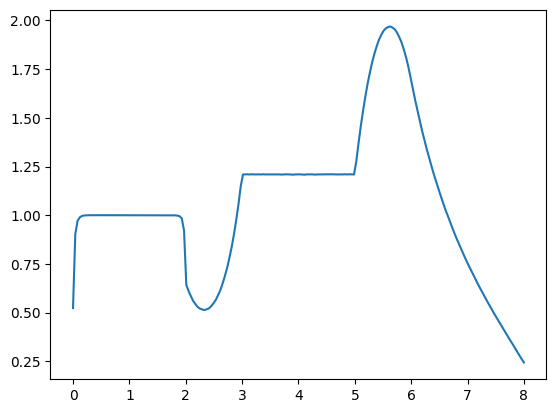

In [4]:
x = np.linspace(0, 8, 200)
u = adpn_prob.interpolate_solution(x, k =0, energy_group=0)
plt.plot(x, u, label='ADPN')